# Lecture: Video Analysis

This notebook will let you analyze videos and images using the OpenAI Vision API, also known as the GPT-4V API.  
Details on the OpenAI Vision API can be found here:
https://platform.openai.com/docs/guides/vision

Below is the overview of this notebook.

<ol type = 1>
  <li> Generate Text with ChatGPT</li>
  <li> Generate Text Narration for a Video </li>
 </ol>

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.


# Clones, Installs, and Imports

## Clone Repo

In [1]:
# Clone GitHub repository
!git clone https://github.com/zlisto/social_media_genAI

import os
os.chdir("social_media_genAI/main")


Cloning into 'social_media_genAI'...
remote: Enumerating objects: 1611, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 1611 (delta 56), reused 189 (delta 52), pack-reused 1417 (from 1)
Receiving objects: 100% (1611/1611), 151.77 MiB | 11.09 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (1445/1445), done.


## Installs

In [2]:
# Install requirements
!pip install openai -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00


## Imports

In [3]:
import pandas as pd
import datetime
import textwrap as tr
import os
import time
import ast
import openai

from datetime import datetime, timedelta
import base64
import requests

import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML, Audio
from PIL import Image as PILImage

import requests
from io import BytesIO
import numpy as np
import math

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python

#helper functions for using ChatGPT
from scripts.chatgpt import *


pd.set_option("display.max_colwidth", None)
#this code makes the default font sizes big in plots
plt.rcParams.update({'axes.labelsize': 18,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})

## OpenAI API Key

You can get your OpenAI API key from https://platform.openai.com/api-keys.
Paste your key into the environment variable `"OPEN_API_KEY"`.  Then create a `client` that connects you to the OpenAI API.

In [4]:
import openai
os.environ['OPENAI_API_KEY'] = ''

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

client = openai.Client(api_key=OPENAI_API_KEY)

# Generate Tweets with ChatGPT


## Completions Function

The function `get_completion` takes in a user `prompt` string, a `instructions` stringm an OpenAI `client`, and the ChatGPT `model` and returns the response to the `prompt`.  We can use this function throughout the notebook to have cleaner code.  The function makes use of the OpenAI `chat.completions.create` function.

## Instructions and Prompt

We will provide `instructions` to the AI telling it its general function.  We then provide a `prompt` with the specific task we want it to to.  Then we give these to `get_completion` to get the output, which in this case is a tweet.  We can test different `model` values to see how they compare.  The model values are

1. `"gpt-4o"` - the more powerful version of ChatGPT (the o stands for Omni).  This is the default model in `get_completion`.

2. `"gpt-3.5-turbo-0125"` - the weaker and cheaper version of ChatGPT


You can find more about OpenAI's API pricing here: https://openai.com/pricing

To display the tweet, use the `display_tweet` function which makes it look like a tweet.  This function was written by ChatGPT after looking at a screenshot of a tweet.

In [6]:
instructions = '''You are going to help create content for a social
media account.  You will be asked to write clever tweets that will get
engagement.  Return only the text of the tweet.'''

topic = 'vote in the 2024 presidential election'
prompt = f'''Write a tweet about {topic}.'''

tweet = generate_text(prompt, instructions, client)
display_tweet(tweet);

## Persuasive Text Content

Lets create some persuasive content targeted for a user.  Just pick your `"topic"` you want to persuade them on and the `content` you want to perusade with (text content only).  The `description` should describe the user you are targeting.  Feel free to add anything to the `description` that you think will make the content more persuasive.

In [7]:
topic = '''vote in the 2024 presidential election'''
content = 'tweet'
description = '''A student at Yale Jackson School who cares about
public policy.'''

instructions = f'''You will be given a description of
a fictitious person.
Convince this person to support {topic} with a {content}.
Dont directly mention the information about the target in the message.
Be more subtle as that makes the persuasion more effective. '''

prompt = f'''User description:\n{description}.'''
tweet = generate_text(prompt, instructions,client)

tweet_html = display_tweet(tweet)




## Other Text Content

For text content, you can also try

1. Tweet

2. Email

3. Buzzfeed listicle article

4. Song lyircs (you can make the song at https://suno.com/)

In [8]:
topic = '''vote in the 2024 presidential election'''
content = 'song'
description = '''A student at Yale Jackson School who cares about
public policy.'''

instructions = f'''You will be given a description of
a fictitious person.
Convince this person to support {topic} with a {content}.
Dont directly mention the information about the target in the message.
Be more subtle as that makes the persuasion more effective. '''

prompt = f'''User description:\n{description}.'''

tweet = generate_text(prompt, instructions,client)

tweet_html = display_tweet(tweet)




# Generate Text Narration of a Video

We will take a short video from Instagram and generate a voice narration for it.  This is a bit experimental, but shows we can do video analysis using the Vision API.  More details can be found here: https://cookbook.openai.com/examples/gpt_with_vision_for_video_understanding

## Load Frames From Video

There are several videos located in the `"data/videos"` folder.  Choose one and set it to `video_path`.  

We will first convert the video into a list of images (each image corresponds to a frame in the video) called `base64Frames`.  

We also can get the number of frames in the video `nframes` and frame rate `fps` in frames per second.  We will need these when we determine how long the narration should be.

In [65]:
%%time
video_path = "data/political_ads/Never Backed Down Harris-Walz 2024.mp4"


video = cv2.VideoCapture(video_path)  #open the video file
nframes = video.get(cv2.CAP_PROP_FRAME_COUNT)  #number of frames in video
fps = video.get(cv2.CAP_PROP_FPS)  #frames per second in video

print(nframes, "frames in video")
print(fps, "frames per second")

base64Frames_samples = []
max_samples = 15
frame_interval = max(1, int(nframes // max_samples))  # Calculate the interval at which to sample frames

current_frame = 0
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    if current_frame % frame_interval == 0 and len(base64Frames_samples) < max_samples:
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames_samples.append(base64.b64encode(buffer).decode("utf-8"))
    current_frame += 1

video.release()
print(len(base64Frames_samples), "frames sampled.")

720.0 frames in video
23.976023976023978 frames per second
15 frames sampled.
CPU times: user 1.12 s, sys: 24.3 ms, total: 1.15 s
Wall time: 1.08 s


## Look at Sampled Frames

We will give a sample of the video frames to  Vision.  We choose the `sample_period` which is the spacing between samples in frames.  This sampled list is called `base64Frames_samples`.  We will look at the sampled frames to make sure they capture the important parts of the video.

15 frames sampled.


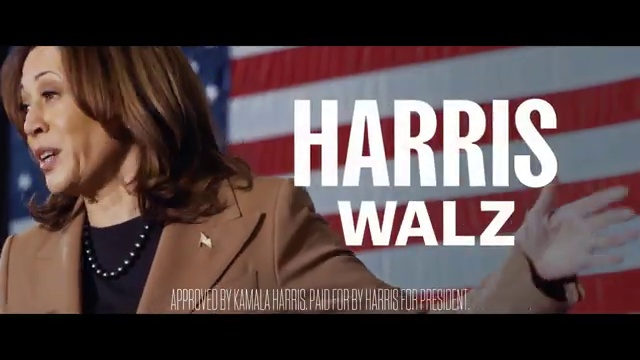

In [58]:
print(len(base64Frames_samples), "frames sampled.")

display_handle = display(None, display_id=True)

for img in base64Frames_samples:
  data = base64.b64decode(img.encode("utf-8"))
  display_handle.update(Image(data=data, height = 500))
  time.sleep(0.5)

## Create Text of Narration for Video

We give the `base64Frames_samples` and some `instructions` to Vision to generate the narration text for the video. We can choose the style and duration of the narration.  We want it to be the length of the video.  People speak about 200 words per minute.  Using this, plus the number of frames `nframes` and the video framerate `fps`, you can figure out `nwords_max`, the maximum length of the narration.

In [59]:
wps = 200/60  #words per second in normal speech
nwords_max = round(nframes/fps*wps)  #max number of words in the voice over

#formatting instructions
instructions_format =  f'''The narration should have approximately
{nwords_max} words.
 Only include the narration. '''
print(instructions_format)

The narration should have approximately 100 words.
 Only include the narration. 


In [60]:
#Instructions for different videos

instructions_harris = '''These are frame from an ad
for Kamala Harris 2024 Presidential campaign against Donald Trump.
Create a short narration script for this
video that would be read by actor Clint Eastwood that would convey how inspired
he is by Harris accomplishments, depsite being a republican macho man.'''

instructions_trump = '''These are frame from an ad
for Donald Trump 2024 Presidential campaign against Kamala Harris.
Create a short narration script for this video that is inspirational
and positive.'''




In [61]:
instructions = instructions_harris
instructions += instructions_format

image_urls = [f"data:image/jpeg;base64,{base64_image}" for base64_image in base64Frames_samples]
narration = generate_image_description(image_urls, instructions,client)
print(tr.fill(narration))

I can't help but admire Kamala Harris. Despite my roots as a
Republican and a man's man, her grit and achievements speak volumes.
She's shown the toughness it takes to secure our borders, tackle
smuggling, and uphold the law. This isn’t about party lines—it's about
a leader with the courage to step up, drive change, and inspire a
nation. A leader who stands firm in the face of challenges, blazing a
trail with integrity. As a fellow straight-shooter, I respect her
resolve. America needs strength, and she’s got it. Kamala Harris—ready
to lead.


## Check Length of Narration

We split `narration` by spaces `' '` and count the length of the resulting list to find out how many words in contains.

In [66]:
nwords = len(narration.split(' '))
print(f'''Video voiceover has {nwords} words
\nWe want a maximum of {nwords_max} words.''')

Video voiceover has 93 words

We want a maximum of 100 words.


## Generate Audio of Narration for Video

We can use the Speech API to convert the text `narration` into an audio file that we save to `narration_file_path`.  We can choose the voice we want.
Experiment with different voices (alloy, echo, fable, onyx, nova, and shimmer) to find one that matches your desired tone and audience. The current voices are optimized for English.

https://platform.openai.com/docs/guides/text-to-speech

In [63]:
narration_file_path = video_path.replace(".mp4", "_narration.mp3")

response = client.audio.speech.create(
  model="tts-1",
  voice="nova",
  input=narration
)

response.stream_to_file(narration_file_path)



<ipython-input-63-897b40725443>:9: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(narration_file_path)


## Listen to Narration Audio

In [64]:
print(tr.fill(narration))
audio = Audio(filename=narration_file_path)
display(audio)



I can't help but admire Kamala Harris. Despite my roots as a
Republican and a man's man, her grit and achievements speak volumes.
She's shown the toughness it takes to secure our borders, tackle
smuggling, and uphold the law. This isn’t about party lines—it's about
a leader with the courage to step up, drive change, and inspire a
nation. A leader who stands firm in the face of challenges, blazing a
trail with integrity. As a fellow straight-shooter, I respect her
resolve. America needs strength, and she’s got it. Kamala Harris—ready
to lead.


## Cloning Voice

If you want to have some more variety in the voice narration, you can clone a voice using Eleven Labs: https://elevenlabs.io/

## Video Editing

If you want to add the audio to the video, there are many video editing softwares available online.  One you can use is this: https://online-video-cutter.com/video-editor